In [40]:
import Merge_Cartesian 

from decimal import *
import math
import copy
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Get Raw Wavefront Arrays

In [41]:
%matplotlib widget
L_Time = '10'
C_Time = '0.01'

L_impedance = '1000'
C_impedance = '1'

number_periods = '1'

#  INDUCTANCE, CAPACITANCE, LENGTH
Inductor_List = [L_impedance,L_Time,'1']
Capacitor_List = [C_impedance,C_Time,'1']

# VOLTAGE, PERIODS, BUCK, LOAD
Circuit_List = ['1',number_periods,False,'12']

In [42]:
(Storage_Inductor_Completed, 
Storage_Capacitor_Completed,
Voltage_Inductor,
Current_Inductor,
Voltage_Capacitor,
Current_Capacitor,
Time
) = Merge_Cartesian.Process_Wavefronts(Inductor_List,Capacitor_List, Circuit_List)


Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        5000
Inductor Capacitance Per Length :       0.005
Inductor Length :                       1
Inductor Total Inductance :             5000
Inductor Total Capacitance :            0.005
Inductor Velocity :                     0.2
Inductor Time Delay :                   5
Inductor Impedance :                    1000

- The Capacitor -
Capacitor Inductance Per Length :       0.005
Capacitor Capacitance Per Length :      0.005
Capacitor Length :                      1
Capacitor Total Inductance :            0.005
Capacitor Total Capacitance :           0.005
Capacitor Velocity :                    2E+2
Capacitor Time Delay :                  0.005
Capacitor Impedance :                   1

- The Time -
Number Periods :                        1
Simulation Stop Time :                  31.4159265359000
Number of Wavefronts :                  19763184
Number of Layers :                      3143
A :   

Voltage_Accumulation_Inductor = np.full((2*(Merge_Cartesian.Number_of_Layers+1),2*(Merge_Cartesian.Number_of_Layers+1)),Decimal('0'))
Current_Accumulation_Inductor = np.full((2*(Merge_Cartesian.Number_of_Layers+1),2*(Merge_Cartesian.Number_of_Layers+1)),Decimal('0'))

Voltage_Accumulation_Capacitor = np.full((2*(Merge_Cartesian.Number_of_Layers+1),2*(Merge_Cartesian.Number_of_Layers+1)),Decimal('0'))
Current_Accumulation_Capacitor = np.full((2*(Merge_Cartesian.Number_of_Layers+1),2*(Merge_Cartesian.Number_of_Layers+1)),Decimal('0'))

for layer_number in range(0,Merge_Cartesian.Number_of_Layers):
        ## Reset Centre Index    
        Centre_Index_x = 2*layer_number
        Centre_Index_y = 0
        
        for node_number in range(0,layer_number+1):
                # Inductor
                Away_Index_Inductor_x = Centre_Index_x + 1
                Away_Index_Inductor_y = Centre_Index_y
                
                Return_Index_Inductor_x = Centre_Index_x - 1
                Return_Index_Inductor_y = Centre_Index_y
                
                # Capacitor
                Away_Index_Capacitor_x = Centre_Index_x 
                Away_Index_Capacitor_y = Centre_Index_y + 1
                
                Return_Index_Capacitor_x = Centre_Index_x 
                Return_Index_Capacitor_y = Centre_Index_y - 1

                if(node_number == 0 and layer_number ==0): 
                        # Origin Node
                        # Inductor, Origin node = Away only
                        Voltage_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = Voltage_Away[Away_Index_Inductor_x,Away_Index_Inductor_y] 
                        Current_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = Current_Away[Away_Index_Inductor_x,Away_Index_Inductor_y] 
                        
                        # Capacitor, Origin node = Away only
                        Voltage_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = Voltage_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y] 
                        Current_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = Current_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y] 

                elif(node_number == 0 ): 
                        # First Node
                        # Inductor, First Node = Both Merging 
                        Voltage_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = (Voltage_Away[Away_Index_Inductor_x,Away_Index_Inductor_y] + Voltage_Return[Return_Index_Inductor_x,Return_Index_Inductor_y]) 
                        Current_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = (Current_Away[Away_Index_Inductor_x,Away_Index_Inductor_y] + Current_Return[Return_Index_Inductor_x,Return_Index_Inductor_y]) 
                        
                        # Capacitor, First Node = Away only
                        Voltage_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = Voltage_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y] 
                        Current_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = Current_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y]

                elif(node_number == layer_number): 
                        # Last Node
                        # Inductor, Last Node = Away only
                        Voltage_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = Voltage_Away[Away_Index_Inductor_x,Away_Index_Inductor_y] 
                        Current_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = Current_Away[Away_Index_Inductor_x,Away_Index_Inductor_y]
                         
                        # Capacitor, Last Node = Both Merging
                        Voltage_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = (Voltage_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y] + Voltage_Return[Return_Index_Capacitor_x,Return_Index_Capacitor_y]) 
                        Current_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = (Current_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y] + Current_Return[Return_Index_Capacitor_x,Return_Index_Capacitor_y])
                else:
                        # General Node
                        # Inductor, General Node = Both merging
                        Voltage_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = (Voltage_Away[Away_Index_Inductor_x,Away_Index_Inductor_y] + Voltage_Return[Return_Index_Inductor_x,Return_Index_Inductor_y]) 
                        Current_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = (Current_Away[Away_Index_Inductor_x,Away_Index_Inductor_y] + Current_Return[Return_Index_Inductor_x,Return_Index_Inductor_y]) 
                        
                        # Capacitor, General Node = Both merging
                        Voltage_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = (Voltage_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y] + Voltage_Return[Return_Index_Capacitor_x,Return_Index_Capacitor_y])
                        Current_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = (Current_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y] + Current_Return[Return_Index_Capacitor_x,Return_Index_Capacitor_y])
                        
                Centre_Index_x -= 2
                Centre_Index_y += 2
                

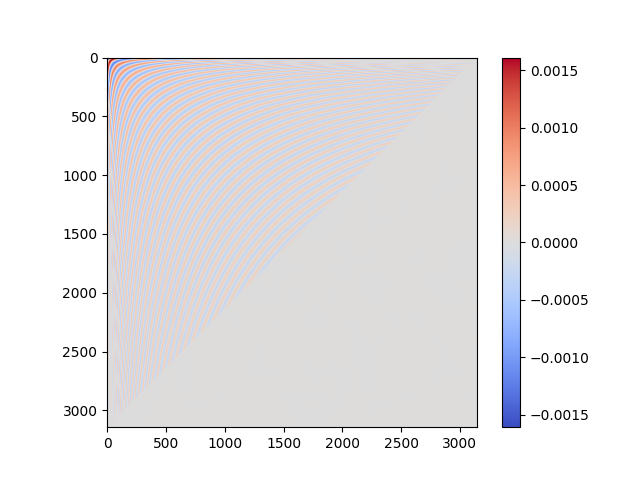

In [43]:
fig1,ax1 = plt.subplots()

Voltage_Contrast = copy.copy(Voltage_Inductor.astype(np.float))
Voltage_Contrast[0,0] = 0
max_boundary = np.max(Voltage_Contrast)  

c = plt.imshow(Voltage_Inductor.astype(np.float),cmap=cm.coolwarm,vmax =max_boundary, vmin = - max_boundary)
plt.colorbar(c)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

Nx,Ny = Voltage_Capacitor.shape
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y)

ax.plot_surface(X,Y,Voltage_Capacitor,cmap=cm.coolwarm)

# Higher Order Merging

## Demonstrating co-factors and LCM -> array index 

In [44]:
Merge_Cartesian.LCM

Decimal('10.0')

In [45]:
Merge_Cartesian.GCD

Decimal('0.01')

In [46]:
Merge_Cartesian.Inductor_LCM_Factor

1

In [47]:
Merge_Cartesian.Capacitor_LCM_Factor

1000

In [48]:
a = Merge_Cartesian.Inductor_LCM_Factor
b = Merge_Cartesian.Capacitor_LCM_Factor

In [49]:
if(Merge_Cartesian.is_Higher_Merging):
    print(Time[a,0])

10


In [50]:
if(Merge_Cartesian.is_Higher_Merging):
    print(Time[0,b])

10.000


## Functions for routine

In [51]:
def make_upper_and_lower(arr,b_factor):
    upper = arr[:,0:b_factor]
    lower = arr[:,b_factor:]
    
    padding_for_upper = np.full(lower.shape,0,dtype=lower.dtype)
    padding_for_lower = np.full(upper.shape,0,dtype=upper.dtype)
    
    upper= np.append(upper,padding_for_upper,axis=1)
    lower= np.append(lower,padding_for_lower,axis=1)
    
    return upper,lower

In [52]:
def shif_and_pad_array_x(arr,number_lines):
    
    rolled_arr = np.roll(arr, number_lines, axis=0)
    
    left_arr = rolled_arr[0:number_lines,:]
    left_arr = np.full(left_arr.shape,0,dtype=left_arr.dtype)
    
    
    rolled_arr= np.delete(rolled_arr,np.arange(0,number_lines,1),axis=0)
    rolled_arr = np.append(left_arr,rolled_arr,axis=0)
    
    return rolled_arr

In [53]:
def multiplicative_merge_cycle(arr,a_factor,b_factor):
    upper_arr,lower_arr = make_upper_and_lower(arr,b_factor)
    arr_merge_ready = shif_and_pad_array_x(lower_arr,a_factor)
    
    arr_merged = upper_arr + arr_merge_ready
    
    return arr_merged

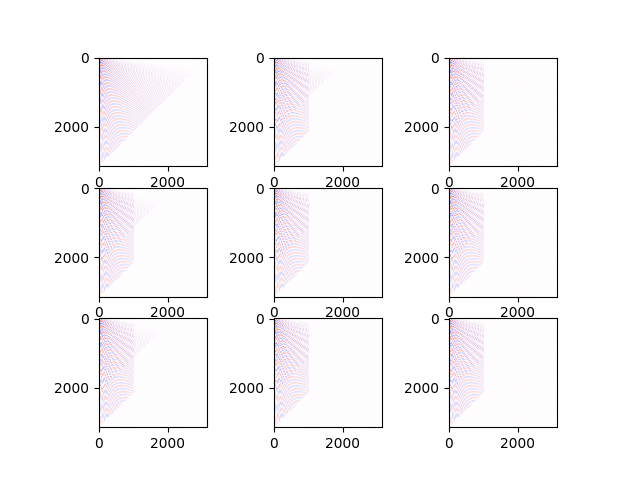

In [54]:
fig_merge,ax_merge = plt.subplots(3,3)

# First Row
c = ax_merge[0,0].imshow(Voltage_Capacitor.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
# plt.colorbar(c, ax=ax_merge[0,0])

voltage_capacitor_merged = multiplicative_merge_cycle(Voltage_Capacitor,a,b)

c = ax_merge[0,1].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
# plt.colorbar(c, ax=ax_merge[0,1])

voltage_capacitor_merged = multiplicative_merge_cycle(voltage_capacitor_merged,a,b)

c = ax_merge[0,2].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
# plt.colorbar(c, ax=ax_merge[0,2])

# Second Row
voltage_capacitor_merged = multiplicative_merge_cycle(Voltage_Capacitor,a,b)

c = ax_merge[1,0].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
# plt.colorbar(c, ax=ax_merge[1,0])

voltage_capacitor_merged = multiplicative_merge_cycle(voltage_capacitor_merged,a,b)

c = ax_merge[1,1].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
# plt.colorbar(c, ax=ax_merge[1,1])

voltage_capacitor_merged = multiplicative_merge_cycle(voltage_capacitor_merged,a,b)

c = ax_merge[1,2].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
# plt.colorbar(c, ax=ax_merge[1,2])

# Third Row
voltage_capacitor_merged = multiplicative_merge_cycle(Voltage_Capacitor,a,b)

c = ax_merge[2,0].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
# plt.colorbar(c, ax=ax_merge[2,0])

voltage_capacitor_merged = multiplicative_merge_cycle(voltage_capacitor_merged,a,b)

c = ax_merge[2,1].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
# plt.colorbar(c, ax=ax_merge[2,1])

voltage_capacitor_merged = multiplicative_merge_cycle(voltage_capacitor_merged,a,b)

c = ax_merge[2,2].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
# plt.colorbar(c, ax=ax_merge[2,2])

In [55]:
def multiplicative_merging(arr,a,b,number_of_layers):
    
    number_merge_cycles = math.ceil(number_of_layers/b) + 1
    
    for _ in range (0,number_merge_cycles):
        arr = multiplicative_merge_cycle(arr,a,b)

    return arr[:,0:b]

In [56]:
voltage_inductor_merged = multiplicative_merging(Voltage_Inductor,a,b,Merge_Cartesian.Number_of_Layers)
current_inductor_merged = multiplicative_merging(Current_Inductor,a,b,Merge_Cartesian.Number_of_Layers)
voltage_capacitor_merged = multiplicative_merging(Voltage_Capacitor,a,b,Merge_Cartesian.Number_of_Layers)
current_capacitor_merged = multiplicative_merging(Current_Capacitor,a,b,Merge_Cartesian.Number_of_Layers)

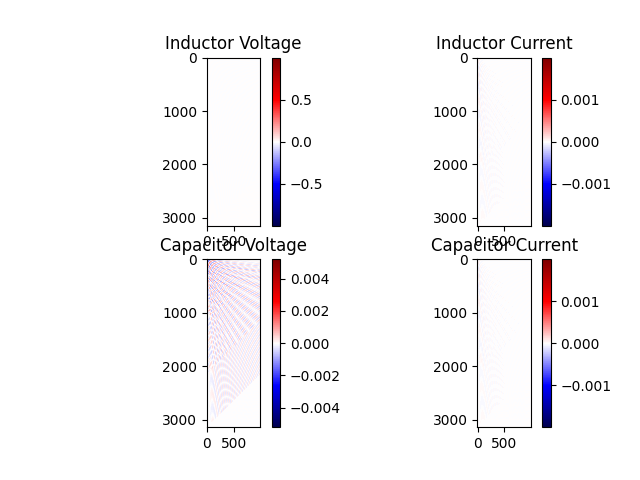

In [57]:
plt.figure()

plt.subplot(2,2,1)
plt.title("Inductor Voltage")
c = plt.imshow(voltage_inductor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(voltage_inductor_merged), vmin = - np.max(voltage_inductor_merged))
plt.colorbar(c)


plt.subplot(2,2,2)
plt.title("Inductor Current")
c = plt.imshow(current_inductor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(current_inductor_merged), vmin = - np.max(current_inductor_merged))
plt.colorbar(c)

plt.subplot(2,2,3)
plt.title("Capacitor Voltage")
c = plt.imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(voltage_capacitor_merged), vmin = - np.max(voltage_capacitor_merged))
plt.colorbar(c)

plt.subplot(2,2,4)
plt.title("Capacitor Current")
c = plt.imshow(current_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(current_capacitor_merged), vmin = - np.max(current_capacitor_merged))
plt.colorbar(c)


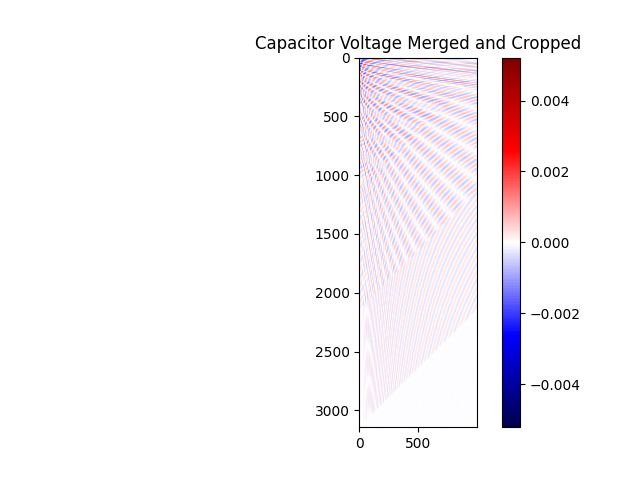

In [58]:
figclvmt,axclvmt =plt.subplots()

plt.title("Capacitor Voltage Merged and Cropped")
c = plt.imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(voltage_capacitor_merged), vmin = - np.max(voltage_capacitor_merged))
plt.colorbar(c)

## Follow Options Ordering

In [59]:
latest_time = 0

x_index = 0
y_index = 0

option_time = []
option_indexes =[]

out_time = []
out_indexes = []
out_voltage = []

Time_Merged = Time[:,0:Merge_Cartesian.b]
Marked = np.zeros(Time.shape,dtype=Time.dtype)
Voltage = voltage_inductor_merged


def store_options(input_arr,x,y,magnitude,indexes):
    x_size,y_size = input_arr.shape
    
    
    if(x+1 < x_size and Marked[x+1,y] == 0):
        
        option_a = input_arr[x+1,y]
        magnitude.append(option_a)
        indexes.append([x+1,y])
        Marked[x+1,y] = 1
    
    if(y+1 < y_size and Marked[x,y+1] == 0):
        
        option_b = input_arr[x,y+1]
        magnitude.append(option_b)
        indexes.append([x,y+1])
        Marked[x,y+1] = 1
    
def get_best_option_value_index(opt_arr,opt_indexes):
    opt_index_min = np.argmin(opt_arr)
    
    value = opt_arr[opt_index_min]
    del opt_arr[opt_index_min]
    
    index = opt_indexes[opt_index_min]
    del opt_indexes[opt_index_min]
    
    return value, index


# Store Initial Point
out_time.append(Time_Merged[0,0])
out_indexes.append([0,0])
out_voltage.append(Voltage[0,0])
Marked[0,0] = 1

while latest_time < Merge_Cartesian.Simulation_Stop_Time:
    
    # store options at location
    store_options(Time_Merged,x_index,y_index,option_time,option_indexes)
    
    
    if(len(option_time) > 0):
        # get best option
        best_time, best_time_index = get_best_option_value_index(option_time,option_indexes)
        
        out_time.append(best_time)
        out_indexes.append(best_time_index)
        
        out_voltage.append(Voltage[best_time_index[0],best_time_index[1]] )
        
        Marked[best_time_index[0],best_time_index[1]]  = 2
    
    latest_time = best_time
    x_index, y_index = best_time_index
    
    

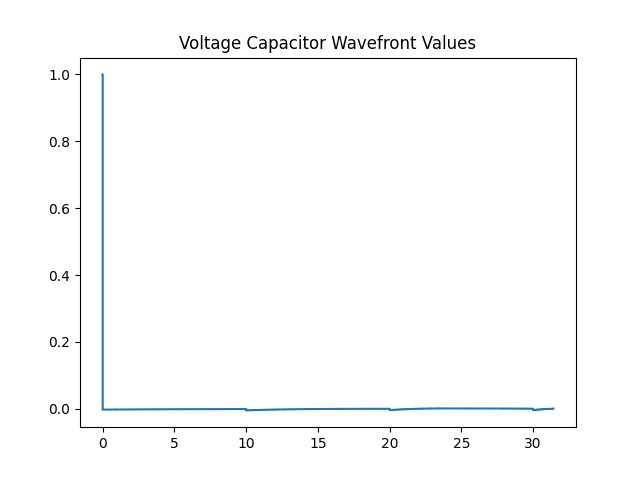

In [60]:
fig_series_voltage,ax_series_voltage =plt.subplots()

plt.title("Voltage Capacitor Wavefront Values")
plt.step(out_time,out_voltage,where='post')


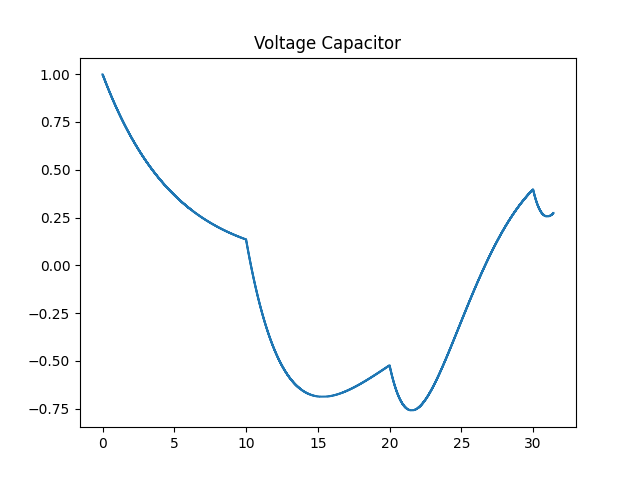

In [61]:
integrated_voltage = np.cumsum(out_voltage)  

fig_integrated_series,ax_integrated_sereis =plt.subplots()

plt.title("Voltage Capacitor")
plt.step(out_time,integrated_voltage,where='post')
  

## Gradient Follow

In [62]:
A = Decimal(L_Time)
B = Decimal(C_Time)

LCM , GCF = Merge_Cartesian.lcm_gcd(A,B)

a = int((B)/(GCF))
b = int((A)/(GCF))

A_to_B_x = 0
A_to_B_y = 0

for  y in range(0,Merge_Cartesian.Number_of_Wavefronts):
    
    if( (y*B - GCF )%A == 0):
        A_to_B_x = (y*B - GCF)/A
        A_to_B_y = y
        break
    
    if(y == Merge_Cartesian.Number_of_Wavefronts ):
        print('Eish')
        

B_to_A_x = 0
B_to_A_y = 0

for  y in range(0,Merge_Cartesian.Number_of_Wavefronts):
    
    if( (y*B + GCF )%A == 0):
        B_to_A_x = (y*B + GCF)/A
        B_to_A_y = y
        break
    
    if(y == Merge_Cartesian.Number_of_Wavefronts ):
        print('Eish')

print('A :',A)
print('B :',B)
print('GCF :',GCF)
print('LCM :',LCM)
print('a :',a)
print('b :',b)
print('A_to_B_x : ' + str(A_to_B_x))
print('A_to_B_y : ' + str(A_to_B_y))
print('B_to_A_x : ' + str(B_to_A_x))
print('B_to_A_y : ' + str(B_to_A_y))

A : 10
B : 0.01
GCF : 0.01
LCM : 10
a : 1
b : 1000
A_to_B_x : 0.00
A_to_B_y : 1
B_to_A_x : 1.00
B_to_A_y : 999
